![](https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg)

El objetivo es analizar las palabras que  más se repiten en función si el comentario es positivo, negativo o neutro y por la clase de hotel.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

In [2]:
comentarios = pd.read_csv("tripadvisor_hotel_reviews.csv")
comentarios.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


**Número de instancias**

In [3]:
print("Nº de instancias:",comentarios.shape[0])

Nº de instancias: 20491


**Tipos de variable**

In [4]:
comentarios.dtypes

Review    object
Rating     int64
dtype: object

**¿Existen valores nulos?**

In [5]:
comentarios.isnull().sum()

Review    0
Rating    0
dtype: int64

**¿Qué clases de hoteles tenemos?**

In [6]:
comentarios.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

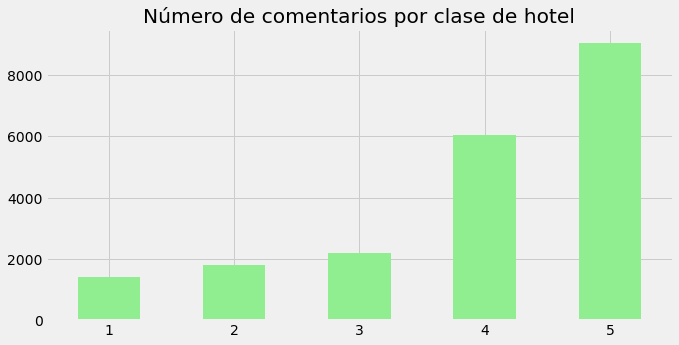

In [7]:
comentarios.Rating.value_counts(sort=False).plot.bar(figsize=(10,5),rot=0,
                                                     title="Número de comentarios por clase de hotel",
                                                     color="lightgreen")
plt.show()

In [8]:
comentarios.Review[101]

"dump stayed weekend expected charming 1929 property based web-site reviews expedia, did n't expect charming mean incompetent staff showers randomly scalding cold medium pressure just trickle tacky acoustic ceilings moldy non-functional windows shower no screens windows no a/c having room left unlocked maid service having wait 18 hours iron gave 30 minutes make wedding having car 8am parking thought desk reality n't etc. etc.expedia apparantly wo n't publish negative reviews like gather having tried 3 times publish on-line calling customer service exchanging e-mails, beware reviews expedia especially beware hotels like,  "

#### Análisis de sentimiento

In [9]:
from textblob import TextBlob

In [10]:
def analisis_sentimiento(df):
    blob=TextBlob(df.Review)
    sentiment=blob.sentiment.polarity
    return sentiment

In [11]:
%%time
comentarios["SA_rank"]=comentarios.apply(analisis_sentimiento,axis=1)

Wall time: 9.72 s


In [12]:
comentarios.head(10)

,Review,Rating,SA_rank
0,nice hotel expensive parking got good deal sta...,4,0.208744
1,ok nothing special charge diamond member hilto...,2,0.214923
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420
3,"unique, great stay, wonderful time hotel monac...",5,0.504825
4,"great stay great stay, went seahawk game aweso...",5,0.384615
5,love monaco staff husband stayed hotel crazy w...,5,0.243056
6,"cozy stay rainy city, husband spent 7 nights m...",5,0.366661
7,"excellent staff, housekeeping quality hotel ch...",4,0.562963
8,"hotel stayed hotel monaco cruise, rooms genero...",5,0.312946
9,excellent stayed hotel monaco past w/e delight...,5,0.286355


**Comentario más positivo**

In [13]:
cmp = comentarios.iloc[comentarios.SA_rank.idxmax]
print("Clase de hotel:",cmp.Rating)
cmp.Review

Clase de hotel: 5


'absolutely wonderful wonderful serene oasis city millions, steps away times square entering hotel peacefulness eveloping, lounge wonderful treat morning afternoon, wonderful treated meet travellers business people share experiences.loved,  '

**Comentario más negativo**

In [14]:
cmn = comentarios.iloc[comentarios.SA_rank.idxmin]
print("Clase de hotel:",cmn.Rating)
cmn.Review

Clase de hotel: 1


'worst location does say place eat sub place, make order bullet proof glass,  '

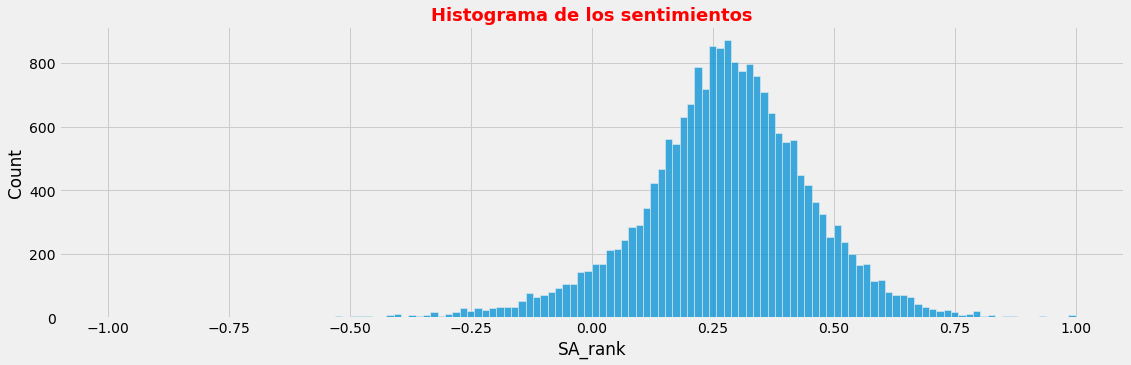

In [15]:
plt.figure(figsize=(17,5))
plt.title("Histograma de los sentimientos",fontsize=18,color='red',fontweight="bold")
sns.histplot(comentarios.SA_rank)
plt.show()

In [16]:
def sentiment(ratio):
    if ratio <=-0.25:
        return "negative"
    elif ratio >=0.25:
        return "positive"
    else: return "neutral"
comentarios["Sentiment"]=comentarios['SA_rank'].apply(lambda x: sentiment(x))

In [17]:
comentarios.iloc[np.random.randint(0,comentarios.shape[0],10),:]

,Review,Rating,SA_rank,Sentiment
14270,fantastic boutique hotel great stay neri centr...,5,0.318254,positive
18521,great place june 21 2008 it__s 8th time wife ...,5,0.481250,positive
16614,"absolutely lovely, place truly heaven atmosphe...",5,0.496154,positive
19922,great hotel money booked hotel trip advisor pl...,4,0.301786,positive
1358,"looking good, stayed hotel year experience nic...",5,0.409037,positive
4986,"nice surprse sent hotel booked, required quad ...",5,0.268669,positive
12342,"stayed victoria court times far, great locatio...",5,0.350000,positive
9007,"looking forward visit, just got spending 4 nig...",5,0.269583,positive
9664,"not good, long stairs impossibly steep, room t...",2,-0.266667,negative
16242,ok hotel mother stayed ramada 4 nights june 20...,3,0.148958,neutral


In [18]:
comentarios["Sentiment"].value_counts()

positive    11984
neutral      8307
negative      200
Name: Sentiment, dtype: int64

De cada 20 comentarios, 1 es negativo

In [19]:
resumen={}
SENTIMENTS = ["positive","negative","neutral"]
for sentiment in SENTIMENTS:
    resumen[sentiment]= comentarios[comentarios["Sentiment"]==sentiment].Rating.value_counts()
resumen=pd.DataFrame(resumen)

In [20]:
resumen

,positive,negative,neutral
1,54,165,1202
2,204,27,1562
3,687,4,1493
4,3781,1,2257
5,7258,3,1793


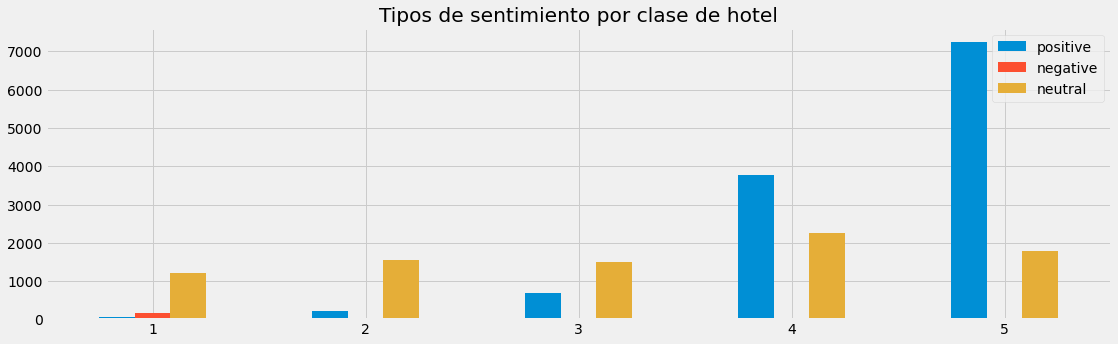

In [21]:
resumen.plot(kind="bar",figsize=(17,5),rot=0,title="Tipos de sentimiento por clase de hotel")
plt.show()

- El volumen de comentarios positivos crece exponencialmente a medida que es mejor la clase de hotel. 
- En los hoteles de menores clases prevalecen los comentarios neutrales.
- Solo se aprecian comentarios negativos en hoteles de mínima clase.

## Wordcloud

### Por tipo de comentarios

In [22]:
def adjuntar_texto(df):
    texto=df.Review.to_list()
    texto_lista=list(filter(None,texto))
    texto_cadena=" ".join(map(str,texto_lista))
    return texto_cadena

In [23]:
for sentiment in SENTIMENTS:
    exec(f"{sentiment}_texto=adjuntar_texto(comentarios[comentarios.Sentiment=='{sentiment}'])")

In [24]:
from wordcloud import WordCloud, STOPWORDS
stop_w = set(STOPWORDS)
stop_w=stop_w.union({"s","room","hotel","going","day","n't"})#palabras comunes e irrelevantes
fontdict={'color':'red','size':'29','fontweight':'bold'}

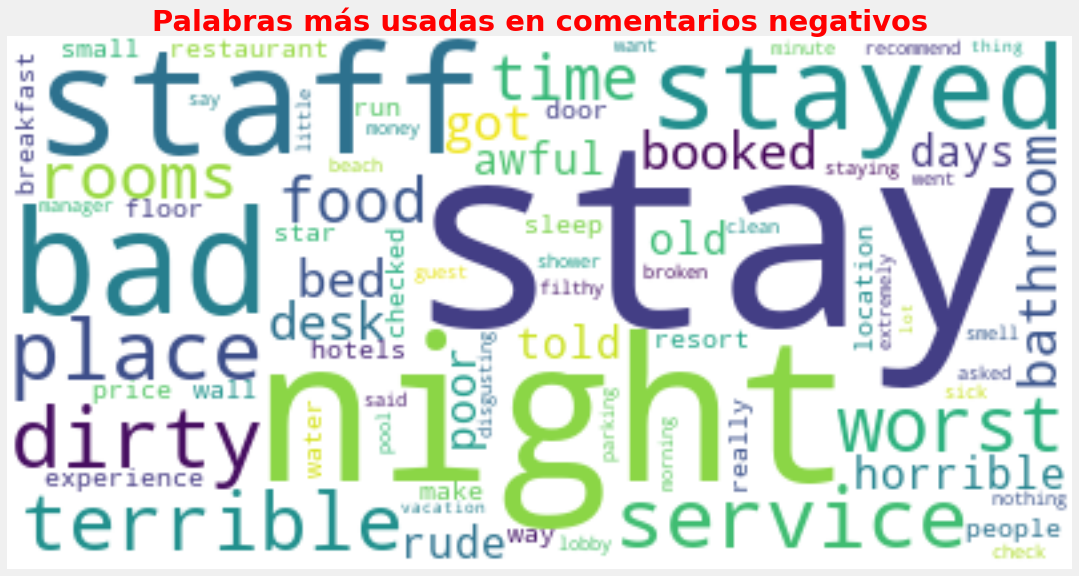

In [25]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75,background_color="white").generate(negative_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios negativos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

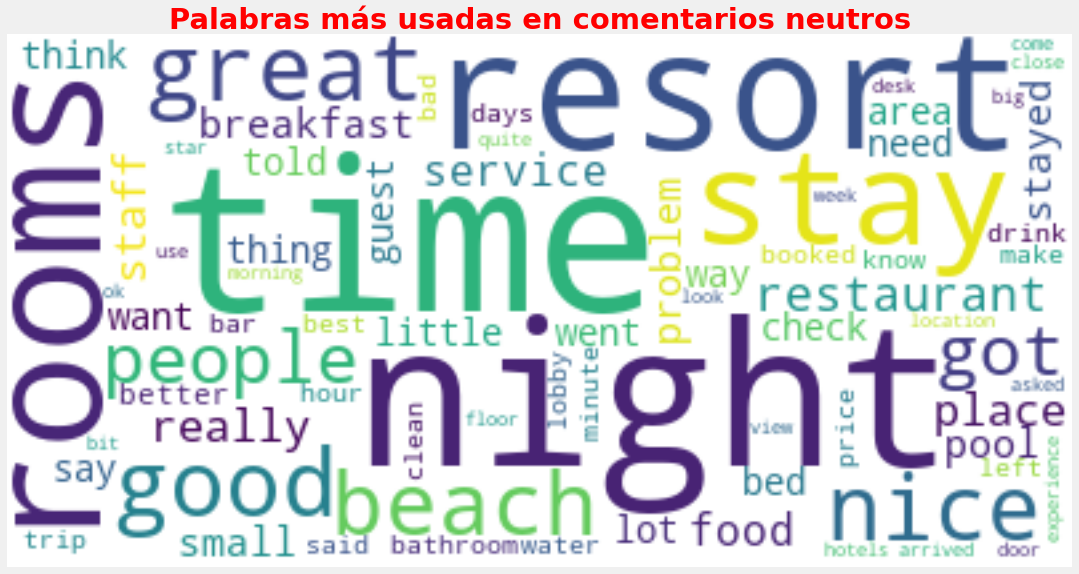

In [26]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white").generate(neutral_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios neutros",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

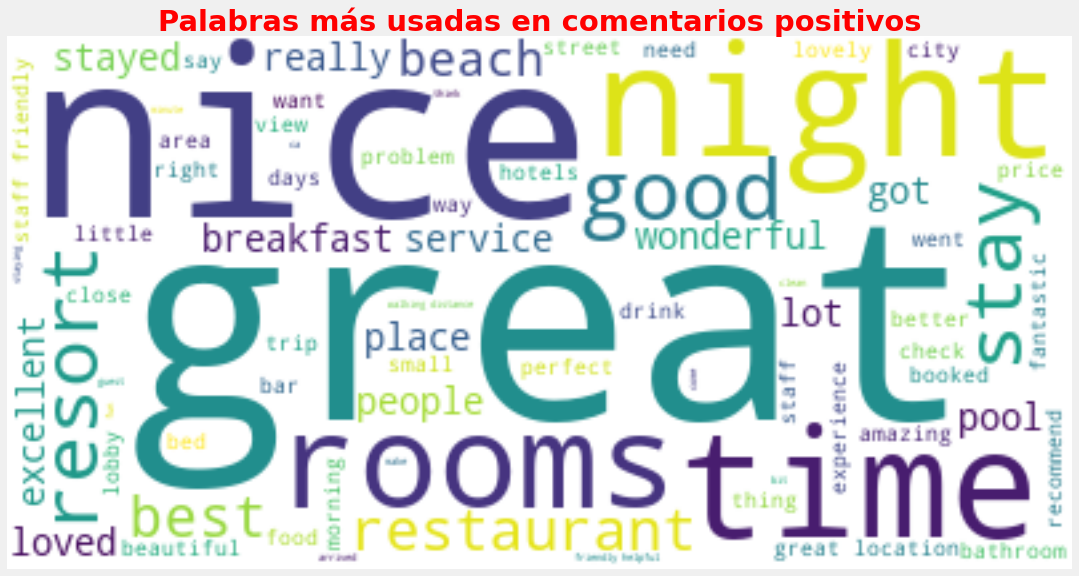

In [27]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white").generate(positive_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios positivos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

### Por clase de hotel

In [28]:
from PIL import Image

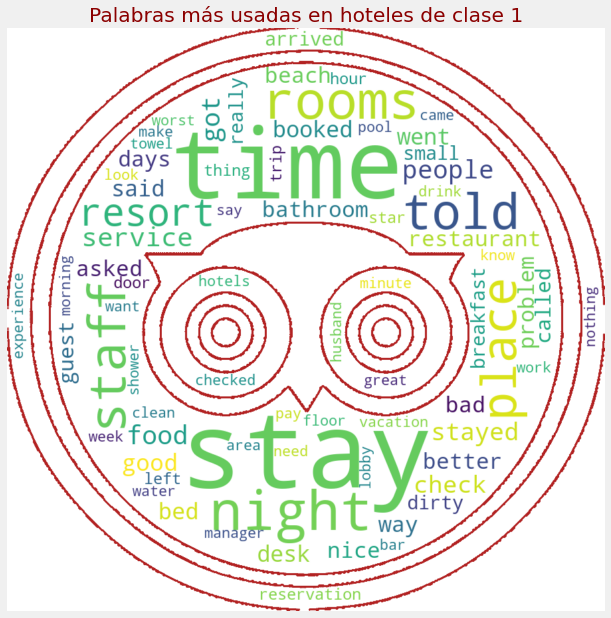

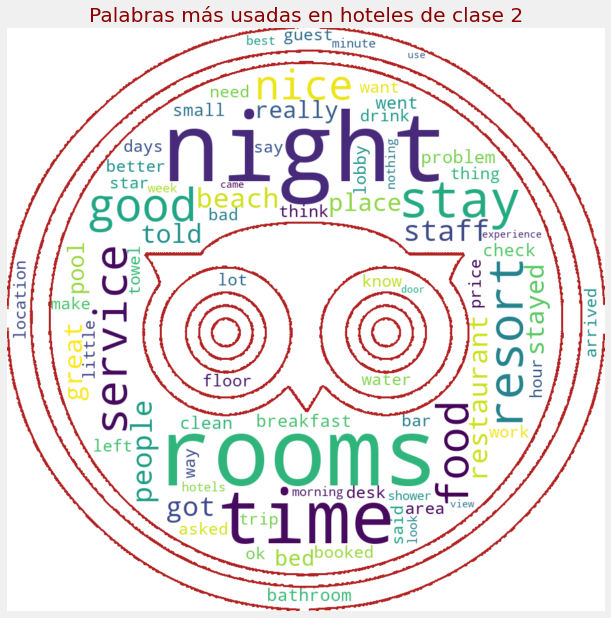

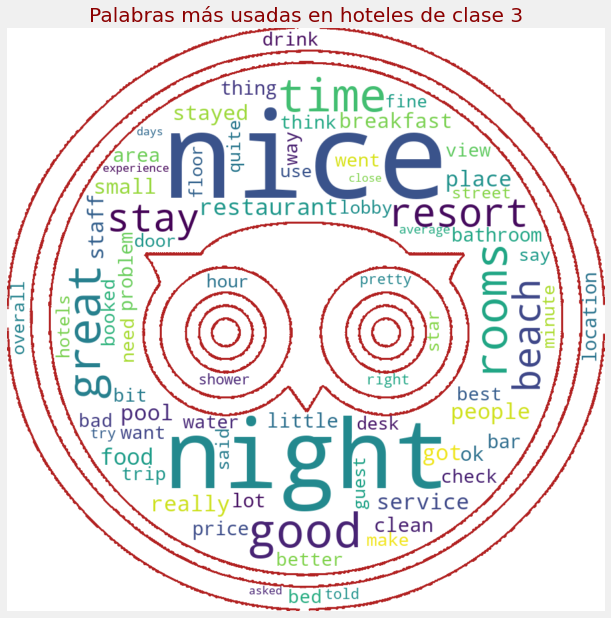

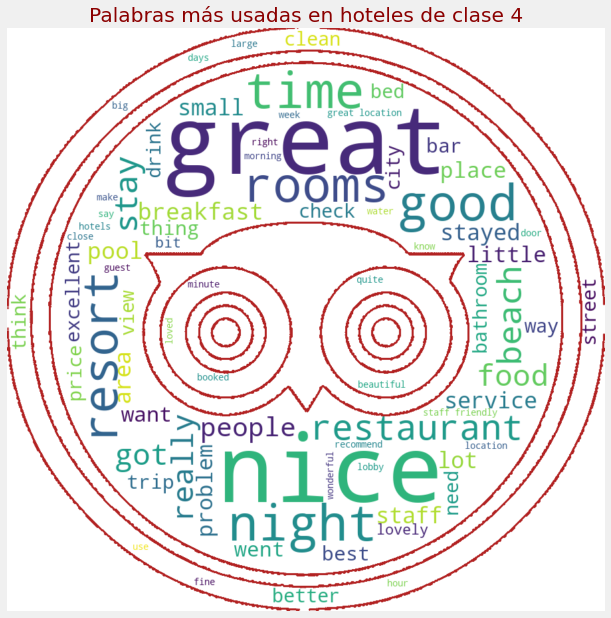

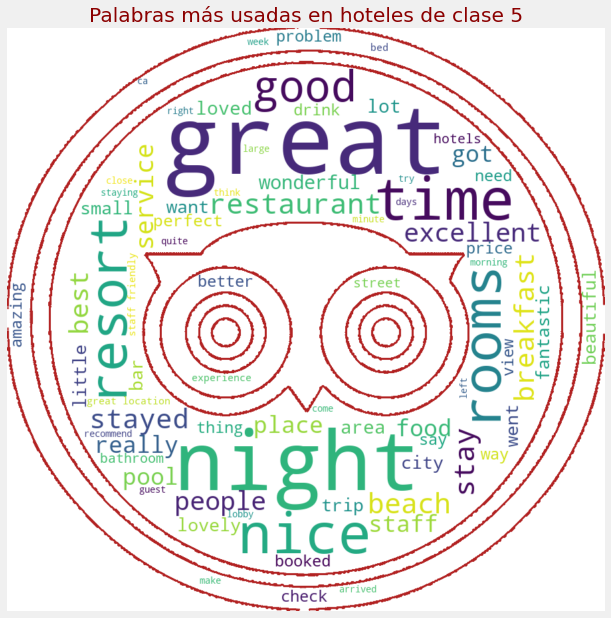

Wall time: 12.2 s


In [29]:
%%time
mask = np.array(Image.open("tripadvisor-logo.png"))
mask[(mask!=255) & (mask!=0)]=255
for i in range(1,6):
    comentarios_tipo_hotel=comentarios[comentarios["Rating"]==i]
    texto=adjuntar_texto(comentarios_tipo_hotel)
    word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white",mask=mask,
                           contour_width=3,contour_color='firebrick',max_font_size=256,random_state=1)
    word_cloud.generate(texto)
    plt.figure(figsize=(15,10))
    plt.title("Palabras más usadas en hoteles de clase {}".format(i),fontdict={'color':'darkred'})
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()